In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
#Eingabemaske:
Q = 1000
D = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,15,50,70,80,85,90,100,110,105,100,90,80,60,40,30,30,20,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
season = [18,38]

In [77]:
time = range(len(D))

lags = [1,2,3]
r1 = [0]*lags[0] + [d * 0.20 for d in D[:-lags[0]]]
r2 = [0]*lags[1] + [d * 0.10 for d in D[:-lags[1]]]
r3 = [0]*lags[2] + [d * 0.10 for d in D[:-lags[2]]]
R = r1+r2+r3
DR = [D[i] - R[i] for i in range(len(D))]
#Wann sollte ich die Retouren runden?

Q_temp = Q
S = [Q_temp := Q_temp - i for i in D] #List Comprehension with Walrus operator

Q_temp = Q
SR = [Q_temp := Q_temp - i for i in DR]

In [78]:
#from tsgenerator import generate
#data = generate(steps=100, seasonality_period=12, seasonality_amplitude=5, trend_slope=0.5)

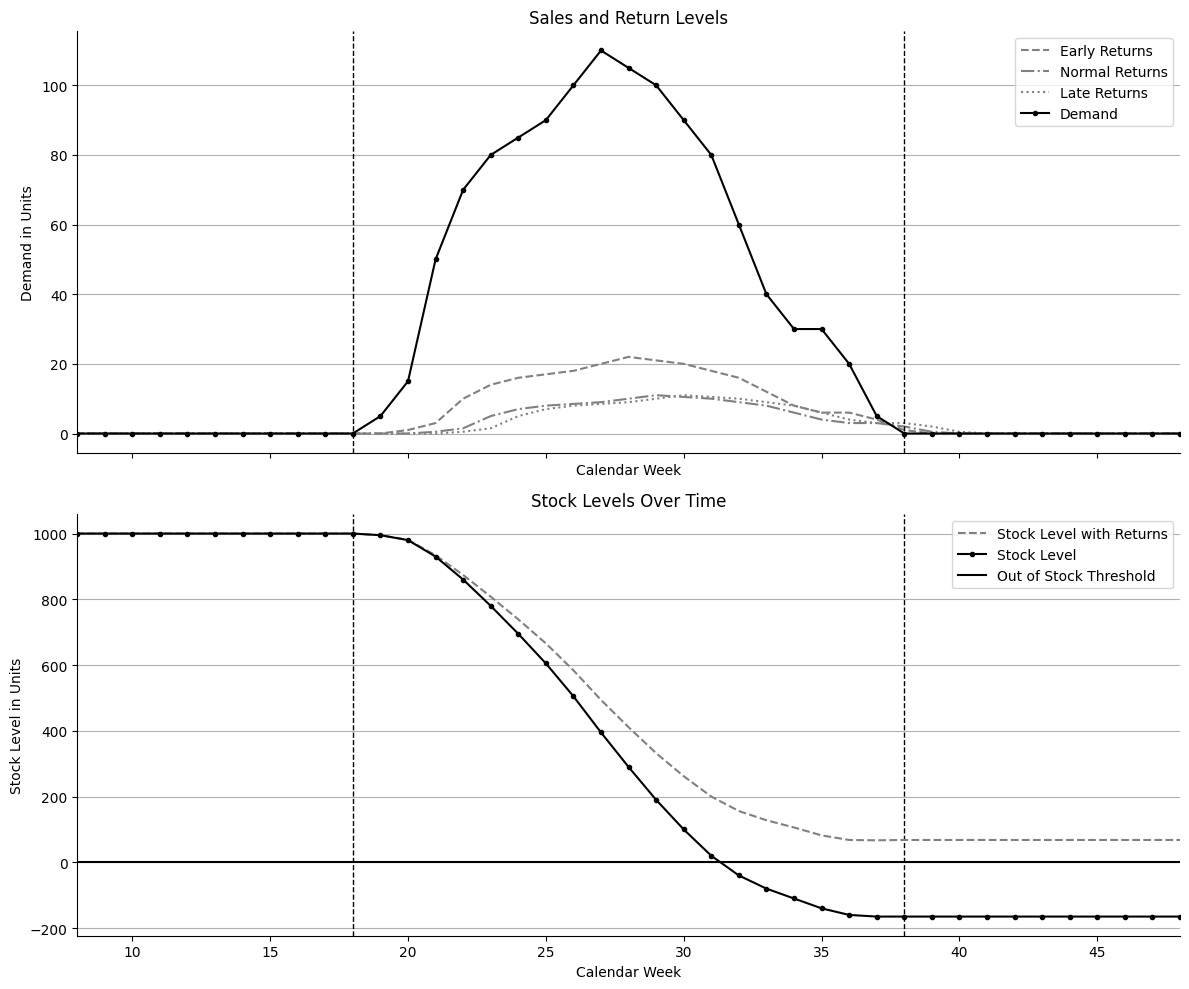

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot demand and additional time series on the first subplot
axes[0].plot(time, r1, marker='', linestyle='--', label="Early Returns", color="grey")
axes[0].plot(time, r2, marker='', linestyle='-.', label="Normal Returns", color="grey")
axes[0].plot(time, r3, marker='', linestyle=':', label="Late Returns", color="grey")
axes[0].plot(time, D, marker='.', linestyle='-', label="Demand", color="black")
axes[0].set_title("Sales and Return Levels")
axes[0].set_xlabel("Calendar Week")
axes[0].set_ylabel("Demand in Units")
axes[0].legend()
axes[0].yaxis.grid(True)  # Enable horizontal grid lines
axes[0].xaxis.grid(False)  # Disable vertical grid lines

# Remove top and right spines for the first subplot
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Add vertical lines for the selling season
for s in season:
    axes[0].axvline(x=s, linestyle='--', color='black', linewidth=1)
    axes[1].axvline(x=s, linestyle='--', color='black', linewidth=1)

# Plot stock levels and out-of-stock threshold on the second subplot
axes[1].plot(time, SR, marker='', linestyle='--', label="Stock Level with Returns", color="grey")
axes[1].plot(time, S, marker='.', linestyle='-', label="Stock Level", color="black")
axes[1].axhline(0, color="black", linestyle="-", label="Out of Stock Threshold")
axes[1].set_title("Stock Levels Over Time")
axes[1].set_xlabel("Calendar Week")
axes[1].set_ylabel("Stock Level in Units")
axes[1].legend()
axes[1].yaxis.grid(True)  # Enable horizontal grid lines
axes[1].xaxis.grid(False)  # Disable vertical grid lines

# Remove top and right spines for the second subplot
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Set x-axis limits to start at 0
axes[0].set_xlim(left=season[0]-10, right=season[1]+10)
axes[1].set_xlim(left=season[0]-10, right=season[1]+10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Eingabemaske als Timestamp

# Initial Inventory
Q = 1000
# Start of Selling Period
start_date = '2023-06-20' #Beginn of Summer
# Length of Selling Period in Weeks
weeks =  12 #using summer as an example
# Sales per Week
D = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 15, 50, 70, 80, 85, 90, 100, 110, 105, 100, 90, 80, 60, 40, 30, 30, 20, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#check if len(D) = selling season

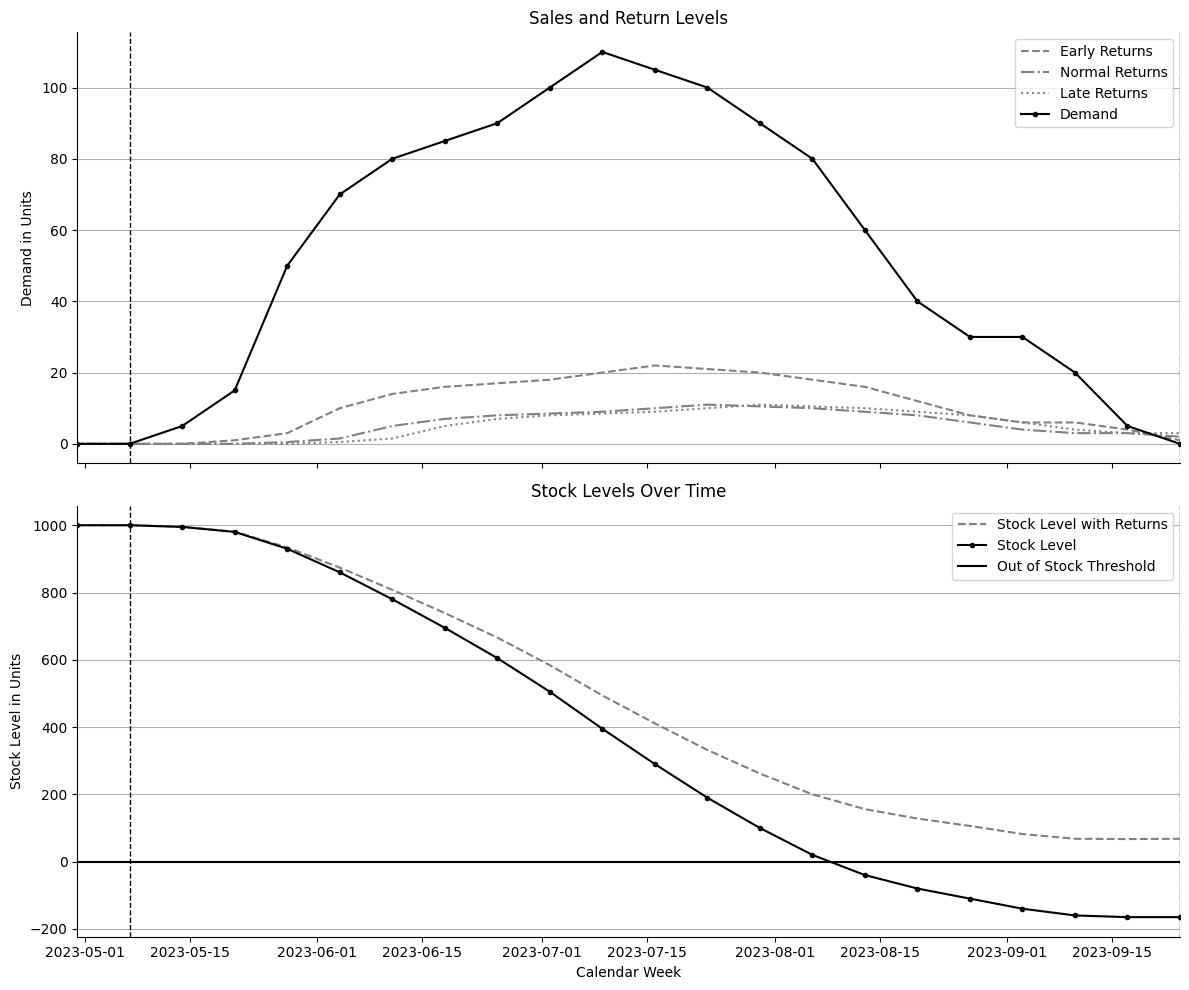

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Input data
Q = 1000
D = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 15, 50, 70, 80, 85, 90, 100, 110, 105, 100, 90, 80, 60, 40, 30, 30, 20, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
season = [18, 38]

# Create a date range for the weeks
start_date = '2023-01-01'  # Adjust the start date as needed
end_date = '2023-12-31'    # Adjust the end date as needed
dates = pd.date_range(start=start_date, end=end_date, freq='W-SUN')[:len(D)]

# Calculate returns
lags = [1, 2, 3]
r1 = [0] * lags[0] + [d * 0.20 for d in D[:-lags[0]]]
r2 = [0] * lags[1] + [d * 0.10 for d in D[:-lags[1]]]
r3 = [0] * lags[2] + [d * 0.10 for d in D[:-lags[2]]]
R = r1 + r2 + r3

# Calculate demand after returns
DR = [D[i] - R[i] for i in range(len(D))]

# Calculate stock levels
Q_temp = Q
S = [Q_temp := Q_temp - i for i in D]  # Stock level after demand

Q_temp = Q
SR = [Q_temp := Q_temp - i for i in DR]  # Stock level after returns

# Create the plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot demand and additional time series on the first subplot
axes[0].plot(dates, r1, marker='', linestyle='--', label="Early Returns", color="grey")
axes[0].plot(dates, r2, marker='', linestyle='-.', label="Normal Returns", color="grey")
axes[0].plot(dates, r3, marker='', linestyle=':', label="Late Returns", color="grey")
axes[0].plot(dates, D, marker='.', linestyle='-', label="Demand", color="black")
axes[0].set_title("Sales and Return Levels")
axes[0].set_ylabel("Demand in Units")
axes[0].legend()
axes[0].yaxis.grid(True)  # Enable horizontal grid lines
axes[0].xaxis.grid(False)  # Disable vertical grid lines

# Remove top and right spines for the first subplot
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Add vertical lines for the selling season
for s in season:
    axes[0].axvline(x=dates[s], linestyle='--', color='black', linewidth=1)
    axes[1].axvline(x=dates[s], linestyle='--', color='black', linewidth=1)

# Plot stock levels and out-of-stock threshold on the second subplot
axes[1].plot(dates, SR, marker='', linestyle='--', label="Stock Level with Returns", color="grey")
axes[1].plot(dates, S, marker='.', linestyle='-', label="Stock Level", color="black")
axes[1].axhline(0, color="black", linestyle="-", label="Out of Stock Threshold")
axes[1].set_title("Stock Levels Over Time")
axes[1].set_xlabel("Calendar Week")
axes[1].set_ylabel("Stock Level in Units")
axes[1].legend()
axes[1].yaxis.grid(True)  # Enable horizontal grid lines
axes[1].xaxis.grid(False)  # Disable vertical grid lines

# Remove top and right spines for the second subplot
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Set x-axis limits to start and end around the selling season
axes[0].set_xlim(left=dates[season[0]-1], right=dates[season[1]])
axes[1].set_xlim(left=dates[season[0]-1], right=dates[season[1]])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()